  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

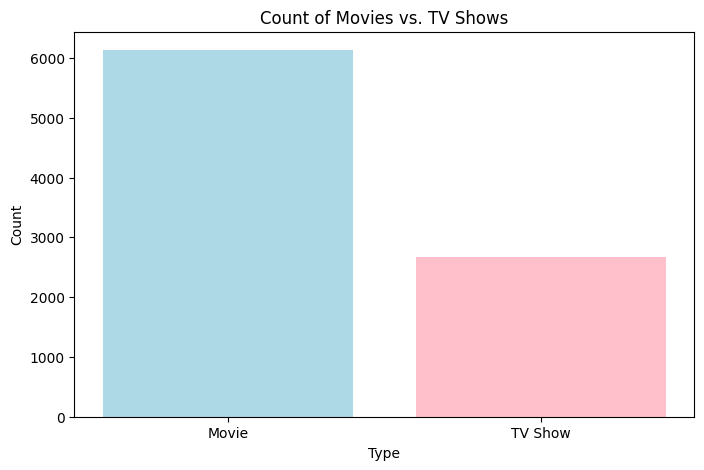

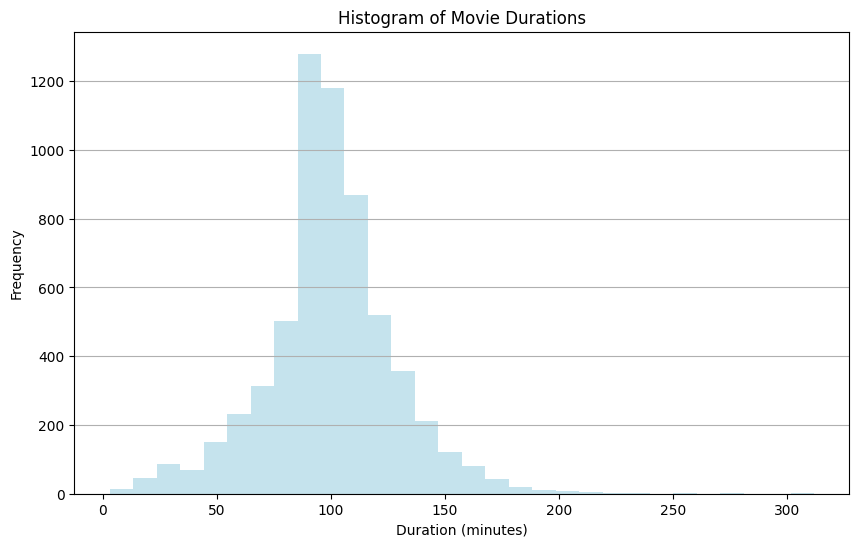

/var/folders/dk/m0585cnj6bxf9cc10m_lgf2w0000gn/T/ipykernel_1334/3524257553.py:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




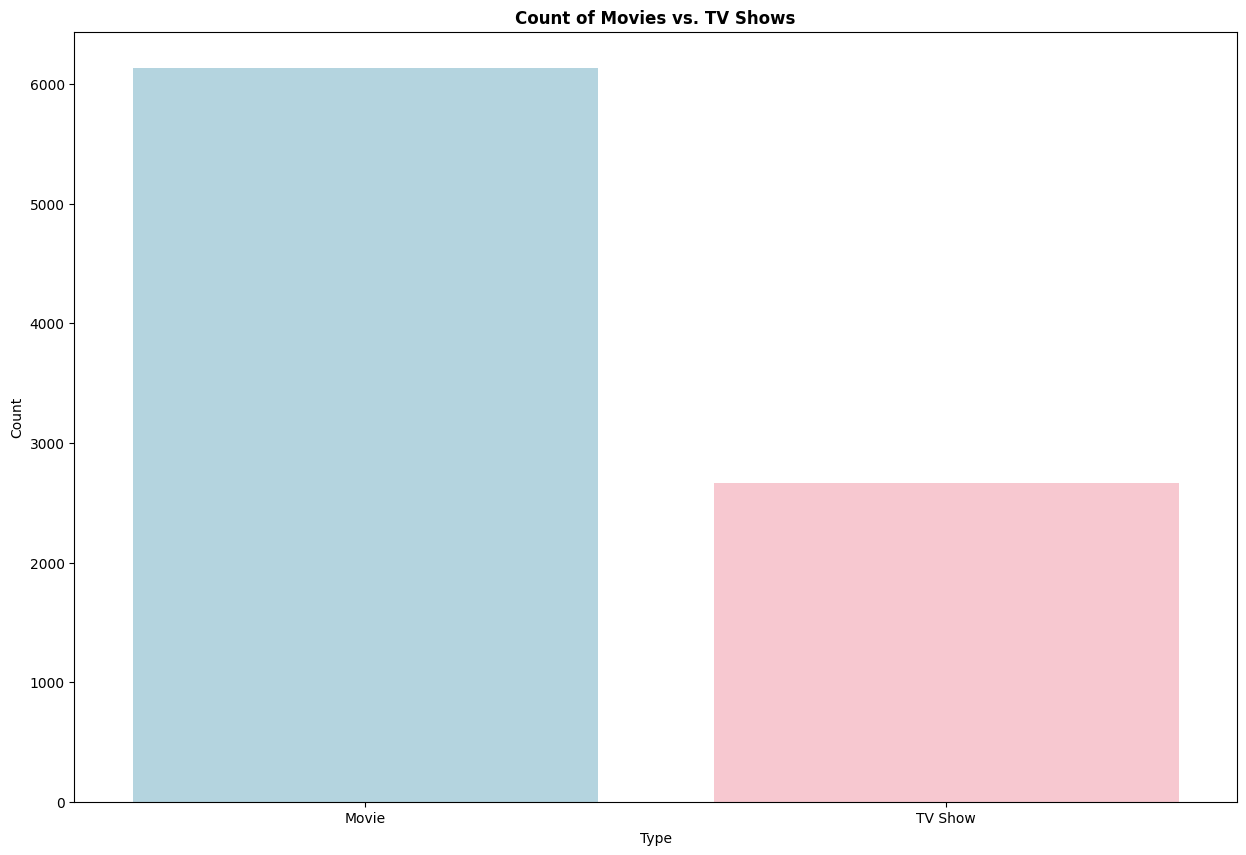

/var/folders/dk/m0585cnj6bxf9cc10m_lgf2w0000gn/T/ipykernel_1334/3524257553.py:69: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




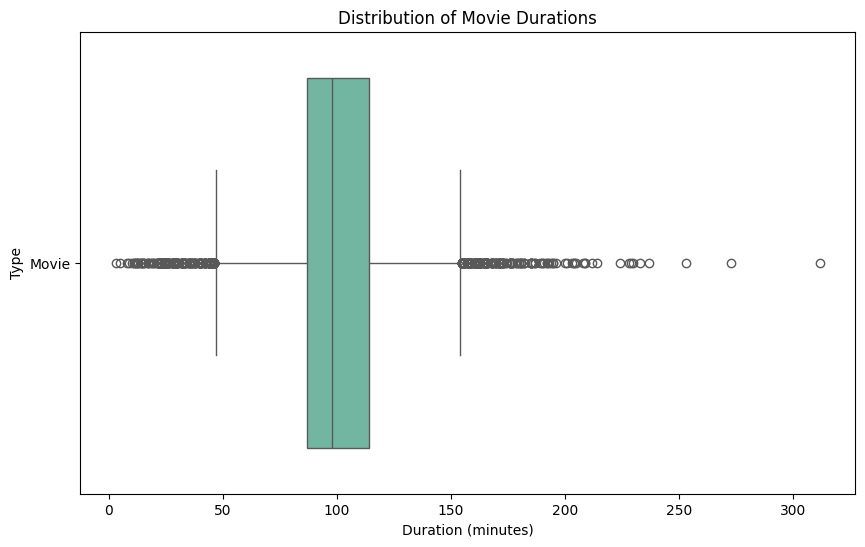

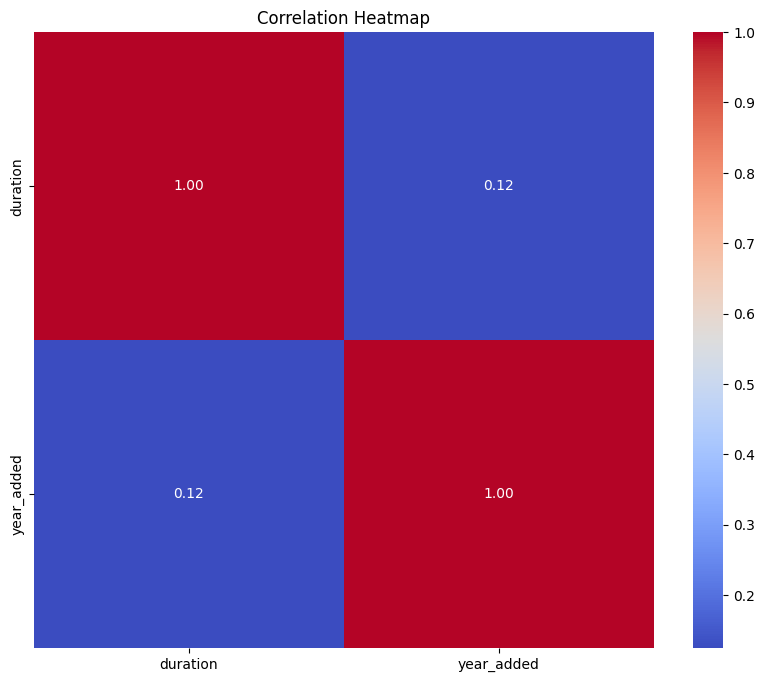

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the Netflix dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check and clean missing values in the date_added column
print("Missing values in date_added:", df['date_added'].isnull().sum())
df = df.dropna(subset=['date_added'])
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from the date added column
df['year_added'] = df['date_added'].dt.year



# Data Visualization with Matplotlib
# Bar Chart: Count of Movies vs. TV Shows
plt.figure(figsize=(8, 5))
content_counts = df['type'].value_counts()
plt.bar(content_counts.index, content_counts.values, color=['lightblue', 'pink'])
plt.title('Count of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Clean and convert the duration column for movies
df['duration'] = df['duration'].str.replace(' min', '', regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Histogram: Movie Durations
plt.figure(figsize=(10, 6))
plt.hist(df['duration'].dropna(), bins=30, color='lightblue', alpha=0.7)
plt.title('Histogram of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Count of content added per year (trend)
content_trend = df['year_added'].value_counts().sort_index().reset_index()
content_trend.columns = ['year_added', 'count']

# Interactive Line Chart: Content Added Trend Over Years
fig = px.line(content_trend, x='year_added', y='count', title='Trend of Content Added Over the Years',
              labels={'year_added': 'Year', 'count': 'Count of Content Added'})
fig.show()



# Data Visualization with Seaborn
# Count Plot: Movies vs. TV Shows
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='type', palette=['lightblue', 'pink'])    
plt.title('Count of Movies vs. TV Shows', weight="bold")
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Box Plot: Distribution of Movie Durations
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', y='type', data=df[df['type'] == 'Movie'], palette='Set2')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Type')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['duration', 'year_added']]  # Ensure only numeric columns are used
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Interactive Visualizations with Plotly
# Interactive Scatter Plot: Release Year vs. Duration for Movies
movies_df = df[df['type'] == 'Movie'].dropna(subset=['duration'])
fig = px.scatter(movies_df, x='release_year', y='duration',
                 title='Release Year vs. Duration for Movies',
                 labels={'release_year': 'Release Year', 'duration': 'Duration (minutes)'})
fig.show()

# Clean and analyze ratings
df['rating'] = df['rating'].str.strip()
df = df.dropna(subset=['rating'])
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

# Pie Chart: Distribution of Content Ratings
fig = px.pie(rating_counts, names='rating', values='count', title='Distribution of Content Ratings', 
             color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

# Interactive Line Chart: Content Added by Release Year
content_per_year = df['release_year'].value_counts().sort_index()
fig = px.line(x=content_per_year.index, y=content_per_year.values,
              title='<b>Trend of Content Added Over the Years</b>',
              labels={'x': 'Release Year', 'y': 'Number of Contents Added'})
fig.show()
